In [24]:
import pandas as pd

## Data analysis and preprocessing

In [25]:
diamonds_df = pd.read_csv('datasets\diamonds\diamonds.csv')
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [26]:
diamonds_df.info()
# There are 9 features, of which 3 are categorical (cut, color and clarity) and 6 numerical (float64). The targe variable, price, is int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 390.8+ KB


In [27]:
diamonds_df.isna().sum()
#There are no missing values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [28]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


Some interesting insigths:

    - comparing the mean of each feature, they have very different scale, so they should be scaled to the same range

    - x,y and z have min=0, which means there's one or more outliers that should be removed since this are physical quantities
    
    - price has min=-1, which also indicates the presence of outliers since the price must be greater than 0

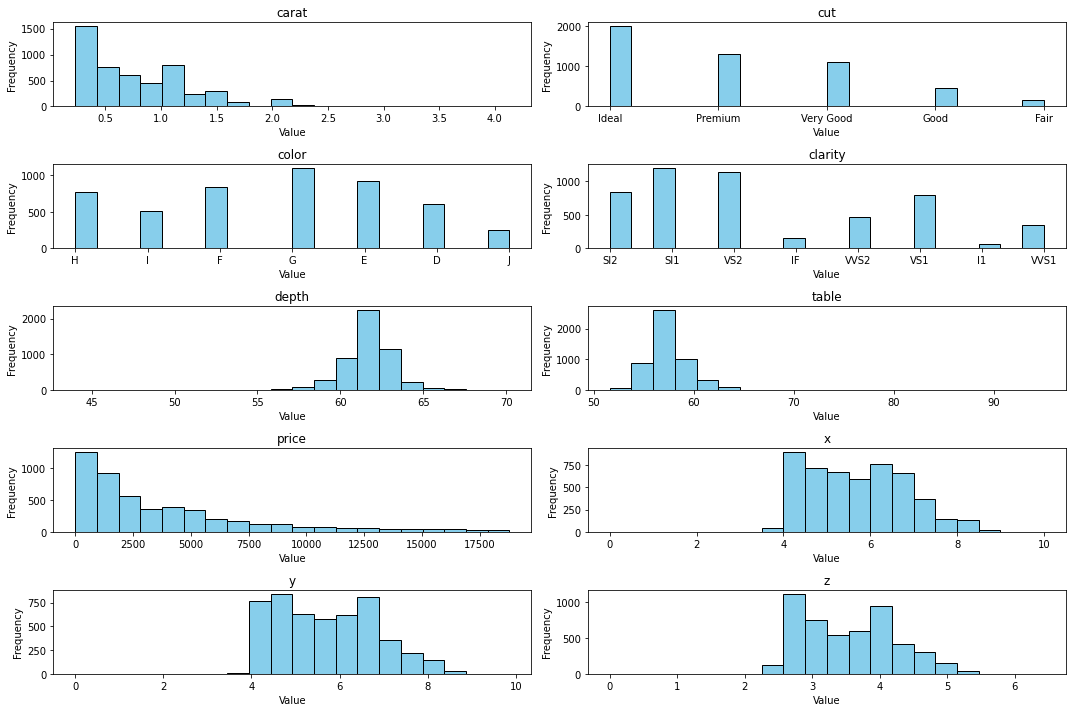

In [29]:
#Plot the distribution of each variable
import matplotlib.pyplot as plt

def plot_distribution(df):
    # Get the column names
    columns = df.columns
    
    # Define the number of rows and columns for subplots
    num_rows = len(columns) // 2
    num_cols = 2 if len(columns) % 2 == 0 else 3
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    
    # Flatten the axes if necessary
    if num_rows == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Plot each column
    for i, col in enumerate(columns):
        ax = axes[i]
        ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Call the function with your dataframe
plot_distribution(diamonds_df)


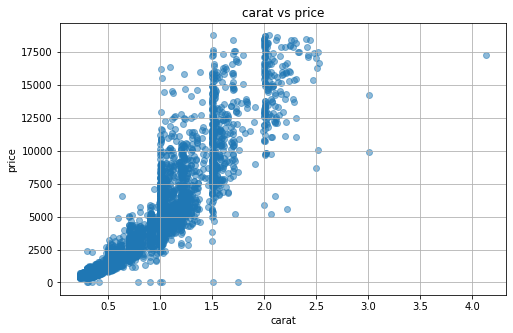

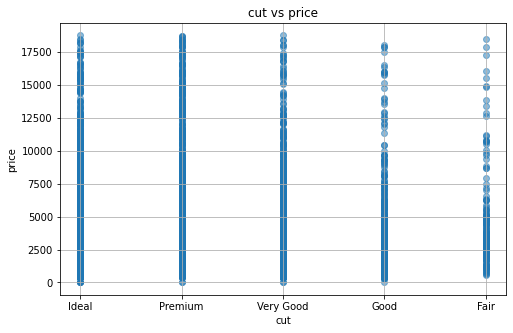

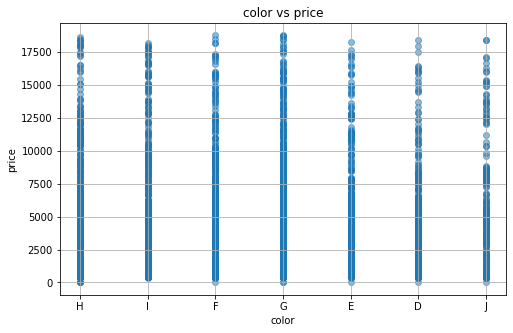

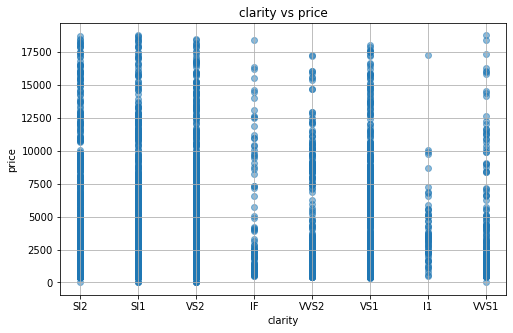

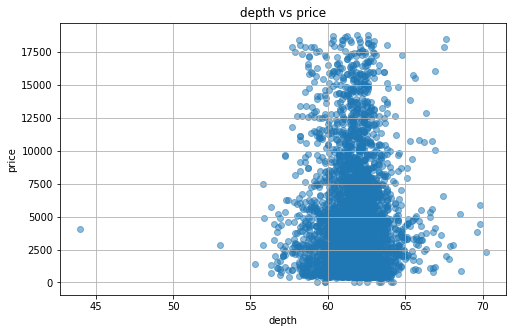

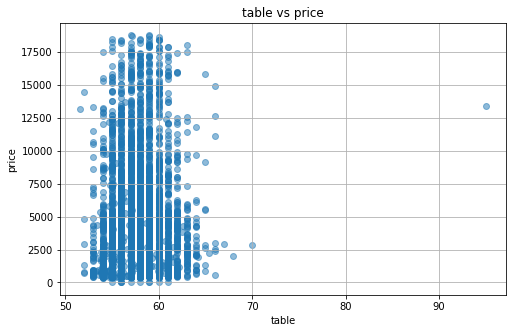

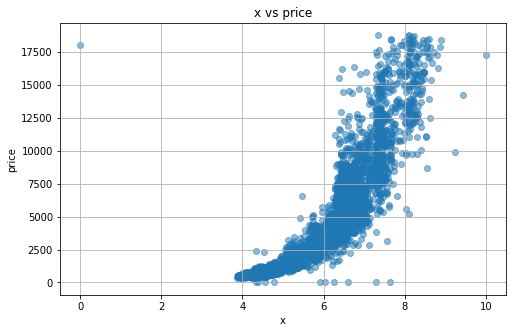

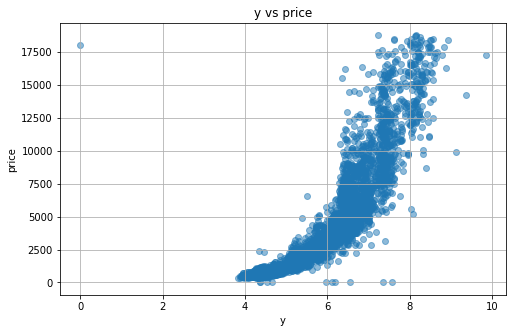

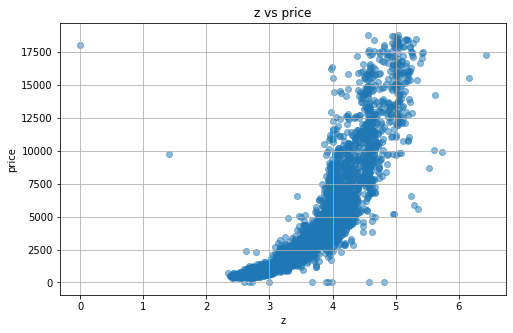

In [30]:
#Plot each feature against price
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is the name of the target column
target_column = 'price'

# Get the list of column names excluding the target column
feature_columns = [col for col in diamonds_df.columns if col != target_column]

# Plot each feature against the target
for feature in feature_columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(diamonds_df[feature], diamonds_df[target_column], alpha=0.5)
    plt.title(f'{feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.show()

#### Handling outliers
In the previous plots, there are points that appear to be outliers. For example, the point with x=0, y=0, z=0 is crearly a mistake and should be removed. Also the points with price=-1, which don't provide any useful information.

In [31]:
diamonds_df[diamonds_df['z'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
4321,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0


In [32]:
diamonds_df[diamonds_df['price'] < 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


In [33]:
diamonds_df = diamonds_df[diamonds_df['price'] > 0]
diamonds_df = diamonds_df[diamonds_df['z'] > 0]
diamonds_df.reset_index(drop=True, inplace=True)

#### Handling categorical data
The categorical variables are cut, color and clarity. The three of them are ordinal, meaning that there's an order between variables. For example, for 'cut', 'Good' > 'Fair', and 'Premium' >> 'Fair'. The same applies to 'color' and 'clarity' (judging from the reference images provided in _md-images). So we can use ordinal encoding, which assigns a numeric value to each variable.
If there was no relationship between classes (for example, in a variable 'country'), one-hot encoding should be used instead, but this come with the disadvantage of increasing the dimensionality of the data.  

In [34]:
print(diamonds_df['cut'].unique())
print(diamonds_df['color'].unique())
print(diamonds_df['clarity'].unique())

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
['H' 'I' 'F' 'G' 'E' 'D' 'J']
['SI2' 'SI1' 'VS2' 'IF' 'VVS2' 'VS1' 'I1' 'VVS1']


In [35]:
cut_order = [['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']]
color_order = [['D','E','F','G','H','I','J']]
clarity_order = [['IF','VVS1', 'VVS2','VS1','VS2','SI1','SI2','I1']]

In [36]:
from sklearn.preprocessing import OrdinalEncoder
cut_encoder  = OrdinalEncoder(categories=cut_order)
color_encoder  = OrdinalEncoder(categories=color_order)
clarity_encoder  = OrdinalEncoder(categories=clarity_order)
diamonds_df['cut']  = cut_encoder.fit_transform(diamonds_df['cut'].values.reshape(-1, 1))
diamonds_df['color']  = color_encoder.fit_transform(diamonds_df['color'].values.reshape(-1, 1))
diamonds_df['clarity']  = clarity_encoder.fit_transform(diamonds_df['clarity'].values.reshape(-1, 1))


In [37]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,0.0,4.0,6.0,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,0.0,4.0,5.0,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,1.0,5.0,5.0,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,0.0,2.0,5.0,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,2.0,2.0,4.0,61.7,57.0,4493,6.17,6.21,3.82


#### Data scaling
min-max scaling is more sensitive to outliers, so I chose z-score scaling instead

In [38]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'price' is the name of the target column
columns_to_scale = diamonds_df.columns[diamonds_df.columns != 'price']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to the data (excluding the target column)
scaler.fit(diamonds_df[columns_to_scale])

# Transform the data
scaled_data = scaler.transform(diamonds_df[columns_to_scale])

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Concatenate the scaled DataFrame with the target column
scaled_df['price'] = diamonds_df['price']

# Now 'scaled_df' contains all columns standardized except for the 'price' column


In [39]:
scaled_df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,4.989000e+03,4.989000e+03,4.989000e+03,4.989000e+03,4.989000e+03,4.989000e+03,4.989000e+03,4.989000e+03,4.989000e+03,4989.000000
mean,7.450444e-17,2.646376e-16,2.447208e-16,3.936630e-16,-1.453805e-15,2.283206e-15,4.103530e-16,-1.202575e-16,1.243699e-15,3930.581880
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,3970.923311
min,-1.205548e+00,-9.798650e-01,-1.541922e+00,-2.415136e+00,-1.225310e+01,-2.587376e+00,-1.672033e+00,-1.703090e+00,-3.085091e+00,351.000000
25%,-8.422491e-01,-9.798650e-01,-9.505891e-01,-5.766060e-01,-4.917912e-01,-6.400643e-01,-9.194428e-01,-9.186387e-01,-9.205513e-01,942.000000
50%,-2.011331e-01,-8.860767e-02,2.320765e-01,3.623749e-02,6.168191e-02,-1.974935e-01,-3.246146e-02,-2.598734e-02,-5.343205e-03,2398.000000
75%,5.254649e-01,8.026497e-01,8.234093e-01,6.490810e-01,5.459709e-01,6.876480e-01,7.290881e-01,7.314138e-01,7.210124e-01,5376.000000
max,7.128959e+00,2.585164e+00,2.006075e+00,1.874768e+00,5.873150e+00,1.662020e+01,3.829043e+00,3.715935e+00,4.207519e+00,18787.000000


#### Data splitting

In [41]:
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe and target_column is the name of your target variable column
X = scaled_df.drop(columns=['price'])  # Features
y = scaled_df['price']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(998,)

## Model selection
Considering the context of the problem, the chosen model should perform regression (as the targe variable 'price' is numerical) and should alse be interpretable (because the clients want to know how the price is calculated). So a first try would be a linear regression, but before we need to check if the data fullfils the linear regression assumptions.

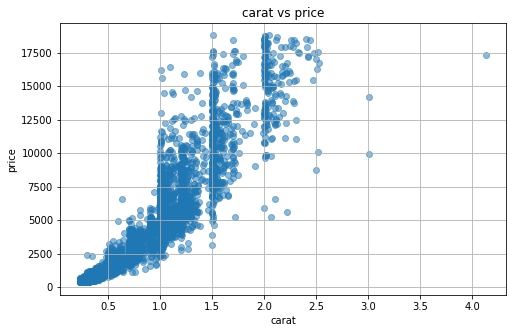

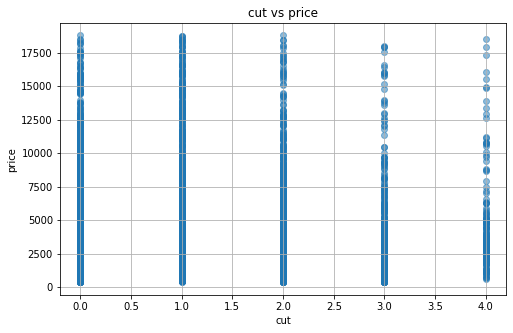

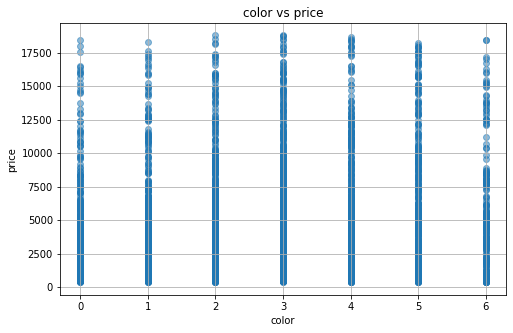

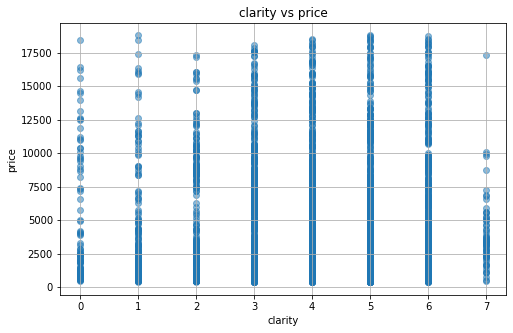

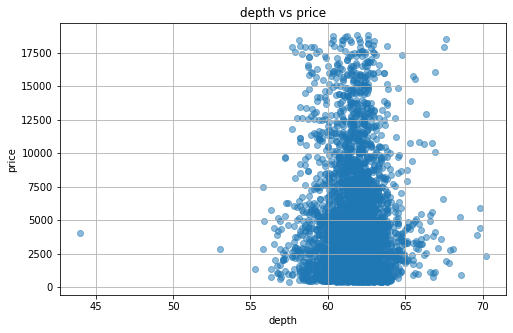

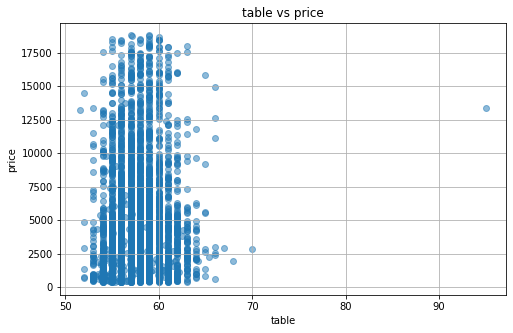

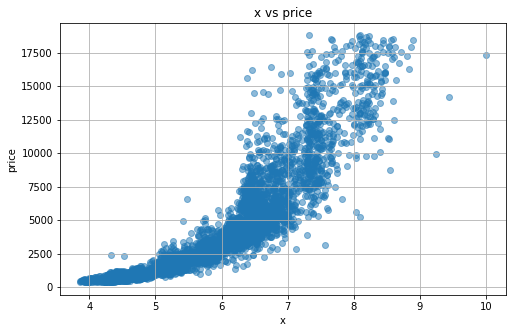

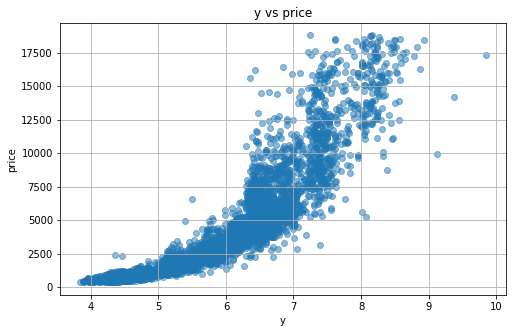

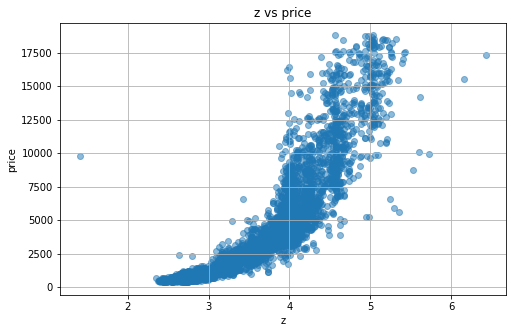

In [45]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is the name of the target column
target_column = 'price'

# Get the list of column names excluding the target column
feature_columns = [col for col in diamonds_df.columns if col != target_column]

# Plot each feature against the target
for feature in feature_columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(diamonds_df[feature], diamonds_df[target_column], alpha=0.5)
    plt.title(f'{feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.show()


In [ ]:
# Let's calculate Persons coefficient to determine the degree of linearity of the features
import numpy as np
from scipy.stats import pearsonr, spearmanr


feature_values = diamonds_df['x'].values
target_values = diamonds_df['price'].values
# Calculate Pearson correlation coefficient
pearson_corr = np.corrcoef(feature_values, target_values)[0, 1]

# Calculate Spearman rank correlation coefficient
spearman_corr, _ = spearmanr(feature_values, target_values)

print("Pearson correlation coefficient:", pearson_corr)
print("Spearman rank correlation coefficient:", spearman_corr)


Pearson correlation coefficient: 0.8870512509048754
Spearman rank correlation coefficient: 0.9627251806022371
